爆大量，超平台，當天上漲

第二步：

爆大量後回檔，超平台，當天上漲

In [1]:
from functions import strat1_vol_surge_cor_dd

/Users/test/Jimmy/tw-screener/tw-stock-screener/functions.py:185: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9831.649831649831' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  current = current_open


returns:  [0.062289562289562284, 0.16284403669724767, -0.047008547008547064]
avg per trade:  0.05937501732608763
winrate:  0.6666666666666666
[[140, 297.0], [200, 218.0], [224, 234.0], [307, 351.5]]
[[154, 315.5], [214, 253.5], [238, 223.0], [314, 433.0, 5]]
return: 0.4406111112833373
14406.111112833372


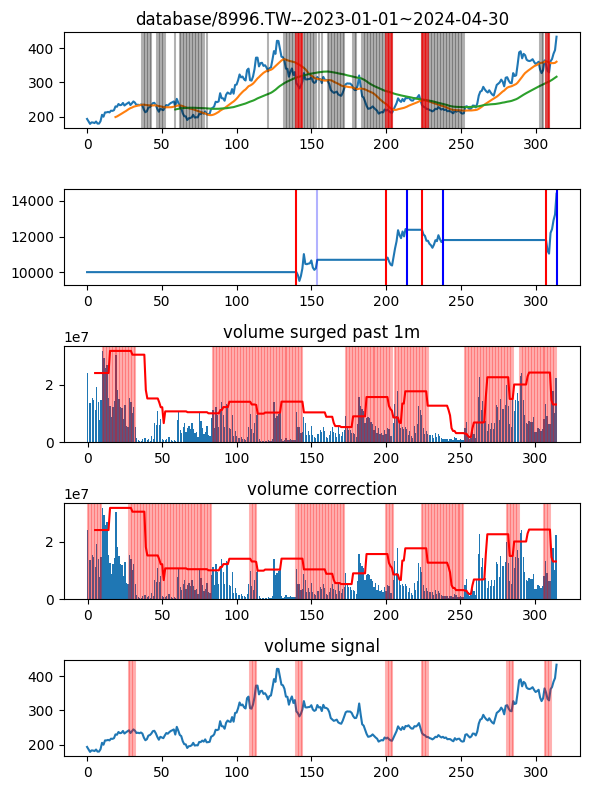

In [19]:
df = strat1_vol_surge_cor_dd(ticker='database/8996.TW', start='2023-01-01')


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_43627/1078904358.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9543.859649122807' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cur[i] = current_open
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[168, 1425.0], [197, 1520.0], [239, 1670.0], [279, 1490.0]]
[[179, 1425.0], [210, 1740.0], [253, 1715.0], [292, 1240.0]]
return: 0.34378650824996737
13437.865082499673


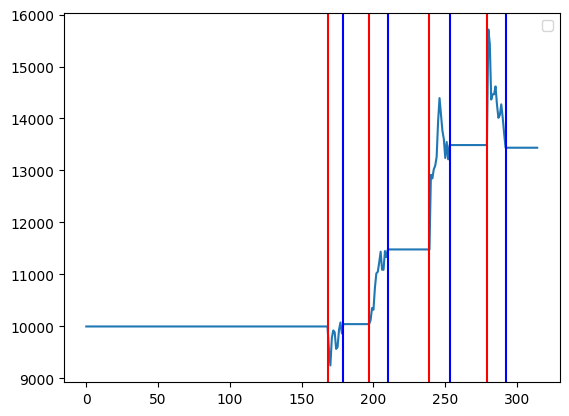

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
start = 10000.0
# ind = df[df['signal_vol_ma_final'] == True].index
# print(ind)
cur = pd.Series([0] * len(df))
cur[0] = start
open_position = []
close_position = []

current = start
holding = False
df['pct_change'] = df['Close'].pct_change()
k = 0
pct_change_all = 0
for i in range(len(df)):
    if df['signal_vol_ma_final'].iloc[i] == False and holding == False:
        cur[i] = current
        continue
    else:
        if holding == False:
            open_position.append([i, df['Close'].iloc[i]])
            buy_price = df['Close'].iloc[i]
            cur[i] = current
            holding = True
        elif holding == True:
            if df['signal_vol_ma_final'].iloc[i] == True:
                k = 0
            pct_change = df['pct_change'].iloc[i]
            pct_change_all += pct_change
            current_open = current * (1+pct_change_all)
            # print(current, pct_change, pct_change_all, current_open, i)
            if k == 10:
                close_position.append([i, df['Close'].iloc[i]])
                holding = False
                current = current_open
                k = 0
            cur[i] = current_open
            
            k += 1
if k != 1:
    close_position.append([i, df['Close'].iloc[i], k-1])
plt.plot(cur)
plt.legend()
for i in open_position:
    plt.axvline(i[0], color='r')
for i in close_position:
    plt.axvline(i[0], color='b')

print(open_position)
print(close_position)
print(f"return: {cur[len(df)-1]/cur[0] - 1}")
print(cur[len(df) - 1])